In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

/tmp/ipykernel_2366/2486202185.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#MAKING THE DATAFRAME

 
# initialize data of lists.
data = {'feature1': [1,2,4,5],
        'feature2': [1,1,3,4]}
 
# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
print(df)

   feature1  feature2
0         1         1
1         2         1
2         4         3
3         5         4


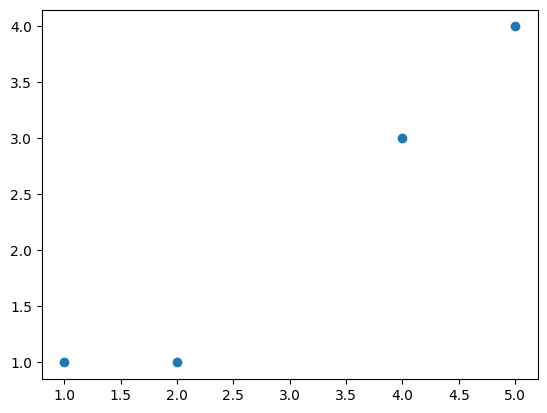

In [3]:
plt.scatter(df['feature1'],df['feature2'])
plt.show()

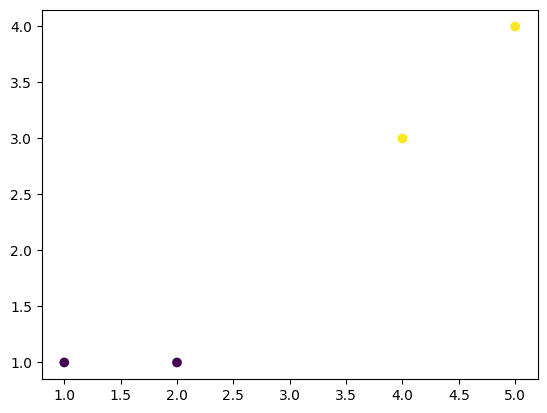

In [4]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
plt.scatter(df['feature1'],df['feature2'], c=kmeans.labels_)
plt.show()

# PERFORMING KMEANS ON A BIGGER DATASET

In [5]:
df=pd.read_csv("../DataSet/iris (2).csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df = df.drop(['Id'], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
X = df.iloc[:,:-1].values #Set our training data
y = df.iloc[:,-1].values

In [9]:
iris_setosa=df.loc[df["Species"]=="Iris-setosa"]
iris_virginica=df.loc[df["Species"]=="Iris-virginica"]
iris_versicolor=df.loc[df["Species"]=="Iris-versicolor"]

In [10]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

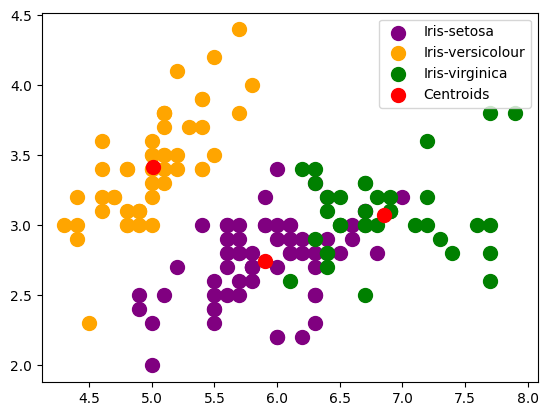

In [11]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()